<p><img alt="Colaboratory logo" height="65px" src="https://upload.wikimedia.org/wikipedia/en/thumb/b/b1/Davivienda_logo.svg/1200px-Davivienda_logo.svg.png" align="left" hspace="10px" width="20%" vspace="15px"></p>

<h1 align="center"> Prueba Técnica Profesional III Departamento de Datos no Estructurados  </h1>


En el Departamento de Datos No Estructurados buscamos personas con excelentes capacidades técnicas a las que les guste explorar los últimos avances en IA para asumir retos de especial dificultad. Aunque la siguiente prueba busca, en primera instancia, corroborar su idoneidad técnica, para nosotros es muy importante que esta destreza venga acompañada de dos elementos adicionales:

1.   Creatividad para encarar desafíos técnicos en procesamiento de datos no estructurados.
2.   Habilidad para comunicar el trabajo hecho y sus resultados a un público general o experto.


---


### **Análisis de Tweets** 

Una de las actividades tipicas en el departamento es el analisis, mineria de texto y procesamiento de lenguaje natural para los diferentes procesos operativos o que tienen interacción con el Banco. Para este ejercicio se adjutará un base de datos llamada **davivienda_tweets.csv** o directamente puede descargarla empleando el siguiente comando.

```
!wget "https://raw.githubusercontent.com/yemoncada/davivienda_tweets/main/davivienda_tweets.csv" -P "/content"
```

Este archivo contiene un conjunto de **tweets extraidos de la red social** de Twitter que contienen la palabra **Davivienda** y con el cual quisieramos conocer cual es la interacción que tienen los diferentes usuarios de la red social con el Banco Davivienda. Todo esto a partir de una exploración general de lo que esta en los textos, cabe destacar que este notebook esta diseñado para que realice una exploración guiada y que por medio de esta vaya realizando sus propios descubrimientos e insights sobre la base de datos.

Por último y con la finalidad de obtener un analisis más detallado, realice un modelo no supervisado Latent Dirichlet Allocation (LDA) que permita conocer por topicos, cuales son los temas más hablados en Twitter asociados a la palabra Davivienda.

<p><img alt="Colaboratory logo" src="https://i.ibb.co/3zNV9vX/1-Gp-PEknl-KMQ09-Uk-Et-Y6-MZOw.png" align="left" hspace="10px" vspace="15px"></p>


***Nota***: *Considere que este ejercicio es hipotético y el banco no usará su trabajo más que para evaluar sus habilidades para el cargo*



---



## Mineria de Texto - Davivienda Tweets.

Con la finalidad de realizar el ejercicio de mineria y procesamiento de lenguaje natural puede utilizar cualquier libreria de python que facilite las siguientes tareas:

1. ***Analisis exploratorio*** y descriptivo de la base de datos davivienda_tweets.csv

2. ***Prepocesamiento del texto***:

    * Tokenizar: Separar el texto en párrafos, frases, etc..
    * Limpieza: Minúsculas, quito puntuación, remuevo palabras de 3 caracteres, etc. Utilice expresiones regulares para limpiar su texto.
    * Stopwords: estas palabras no tienen un significado por sí solas, sino que modifican o acompañan a otras.
    * Lematizar: cambio de tiempos verbales.
    * Estematizar o Stemmed: convertir palabras a sus raíces

3. ***WordClouds o Nubes de Palabras*** que permitan la visualización de datos  textuales significativos y conocer su relevancia en el texto.

4. ***Matriz termino-documento*** - Document-Term Matrix.

5. ***Histograma*** de palabras más importantes.

6. ***Latent Dirichlet Allocation*** - Modelo no supervisado de Tópicos.

7. ***Interpretación de Resultados y conclusiones generales.***


## 1. Análisis Exploratorio

En este a partado realice el análisis exploratorio y descriptivo de la base de datos davivienda_tweets.csv

In [23]:
# Cargar las librerías requeridas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string

In [24]:
# Cargar los datos de los tweets
!wget "https://raw.githubusercontent.com/yemoncada/davivienda_tweets/main/davivienda_tweets.csv" -P "/content"

# Leer y visualizar los datos
raw_data = pd.read_csv('davivienda_tweets.csv')
raw_data.head()

--2022-08-03 18:51:37--  https://raw.githubusercontent.com/yemoncada/davivienda_tweets/main/davivienda_tweets.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 677050 (661K) [text/plain]
Saving to: ‘/content/davivienda_tweets.csv.4’

davivienda_tweets.c 100%[===================>] 661.18K  --.-KB/s    in 0.05s   

2022-08-03 18:51:38 (12.4 MB/s) - ‘/content/davivienda_tweets.csv.4’ saved [677050/677050]



,Unnamed: 0,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,0,Andrés Langebaek,@ALangebaek,2021-12-01T20:43:12.000Z,Andrés Langebaek\n@ALangebaek\n·\n1 dic.,La confianza se afectó. El indicador de confia...,NaN,1.0,7,19,['https://pbs.twimg.com/media/FFjL57eXMAISBnk?...,https://twitter.com/ALangebaek/status/14661458...
1,1,Plaza Futura,@plaza_futura,2021-12-01T21:18:10.000Z,Plaza Futura\n@plaza_futura\n·\n1 dic.,Buscamos la accesibilidad y mejor atención en ...,✅ ✅ ✅ ✅ ✅,NaN,NaN,NaN,['https://pbs.twimg.com/ext_tw_video_thumb/146...,https://twitter.com/plaza_futura/status/146615...
2,2,Julián Martinez,@JulianM998,2021-12-01T22:49:11.000Z,Julián Martinez\n@JulianM998\n·\n1 dic.,Señores \n@Davivienda\n no he podido ingresar ...,NaN,1.0,NaN,1,[],https://twitter.com/JulianM998/status/14661775...
3,3,Ferchis.,@fergomezr28,2021-12-01T12:29:07.000Z,Ferchis.\n@fergomezr28\n·\n1 dic.,Llevo toda una semana sufriendo intento de hur...,NaN,2.0,1,2,[],https://twitter.com/fergomezr28/status/1466021...
4,4,MirandaL2,@MirandaSuspLo,2021-12-01T20:52:36.000Z,MirandaL2\n@MirandaSuspLo\n·\n1 dic.,Hemos retrocedido tanto en este país con este ...,NaN,3.0,NaN,8,[],https://twitter.com/MirandaSuspLo/status/14661...


## 2. Prepocesamiento de Texto

In [87]:
# Eliminar signos de puntuación
raw_data.Embedded_text = raw_data.Embedded_text.apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
# Extraer los tweets en minúsculas
text = raw_data.Embedded_text.str.lower()

In [ ]:
# Importar módulos adicionales
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('all')

In [72]:
# Palabras de alta ocurrencia que se deben omitir
stop_words = set(stopwords.words("spanish"))

In [88]:
# Definir función de limpieza de texto
def clean_text(headline):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(headline)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text

In [89]:
# Aplicar limpieza sobre los tweets
text = text.apply(clean_text)

In [90]:
text.head()

0    confianza afectó indicador confianza daviviend...
1    buscamos accesibilidad mejor atención trámites...
2    señores davivienda podido ingresar davivienda ...
3    llevo toda semana sufriendo intento hurto medi...
4    retrocedido país gobierno malparidos cajeros d...
Name: Embedded_text, dtype: object

## 3. WordClouds o Nubes de Palabras

In [82]:
from wordcloud import WordCloud

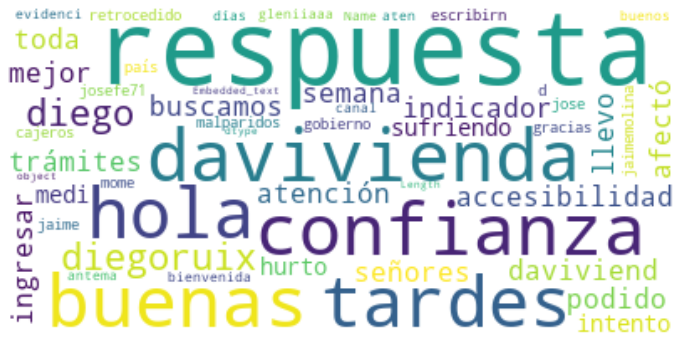

In [99]:
# Crear la nube de palabras
word_cloud = WordCloud(collocations = False,
                        background_color = 'white').generate(str(text))
# Visualizar la nube de palabras generada
plt.figure(figsize=(12,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Matriz termino-documento - Document-Term Matrix

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [124]:
# Crear el vector de palabras en función de la frecuencia
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)
# Matriz termino-documento
doc_term_matrix = vect.fit_transform(text)

idf=vect.idf_
dd=dict(zip(vect.get_feature_names_out(), idf))
l=sorted(dd, key=(dd).get)

# Ver la palabra con mayor y menor frecuencia respectivamente
print(l[0],l[-1])

davivienda recuperar


## 6. Latent Dirichlet Allocation - Modelo no supervisado de Tópicos.

El topic modeling es una técnica no supervisada de NLP, capaz de detectar y extraer de manera automática relaciones semánticas latentes de grandes volúmenes de información.

Estas relaciones son los llamados tópicos, que son un conjunto de palabras que suelen aparecer juntas en los mismos contextos y nos permiten observar relaciones que seríamos incapaces de observar a simple vista.

In [111]:
from sklearn.decomposition import LatentDirichletAllocation

In [112]:
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 

In [125]:
lda_top=lda_model.fit_transform(doc_term_matrix)

In [126]:
# Participación del tópico
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  2.798522675720495 %
Topic  1 :  2.7987269017105665 %
Topic  2 :  74.79740312351714 %
Topic  3 :  2.798501408020673 %
Topic  4 :  2.8019186641654725 %
Topic  5 :  2.8084229150893636 %
Topic  6 :  2.800307091165288 %
Topic  7 :  2.7990930320247123 %
Topic  8 :  2.798580282324693 %
Topic  9 :  2.798523906261589 %


In [127]:
# Palabras más importantes en cada tópico
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
banca maria ratas dejar davivienda saludos foro misterpanbarranquilla beneficios marianiniecheve 

Topic 1: 
seguro 2021 petro davivienda pesar usted idea contenido cambiar respuesta 

Topic 2: 
davivienda bancolombia crédito respuesta cobran manejo banco igual cuota tarjeta 

Topic 3: 
wilsonariasc davivienda respuesta deshacen escribir creo país diferentes cajeros muchas 

Topic 4: 
davivienda respuesta daviplata cuenta banco asnasalvaje dinero solución servicio plata 

Topic 5: 
davivienda respuesta segurosbolivar buen marianiniecheve banco sfcsupervisor caída necesito mañana 

Topic 6: 
lugar equivocado respondiendo davivienda respuesta comercial marianiniecheve pues propaganda wilsonariasc 

Topic 7: 
davivienda andrescepeda atender concierto siempre navidad consultas aquí respuesta dios 

Topic 8: 
mensaje atentos privado respuesta quedamos caso favor buenas tardes gusto 

Topic 9: 
recomiendo davicorredores alguna cuentas saber adicional livedataifx loquehoydebesaber c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 7. Interpretación de Resultados y conclusiones generales.

A partir del análisis LDA se obtiene que el tópico más relevante en los tweets analizados es el tópico 3 (topic 2), el cual hace referencia a productos como el crédito y la tarjeta y algunas características de estos como el cobro de  cuota de manejo, adicionalmente se mencionan otras entidades financieras de la competencia. El resto de tópicos tienen una participación en promedio del 2,8%. Los resultados del modelo presentan oportunidades de mejora ya que aún se identifican palabras que generan distorsión, algunas de ellas se pueden observar en la nube de palabras, y que con una limpieza más profunda de los comentarios se podría obtener una mejora significativa, adicionalmente lemantizar y estematizar podría tener un impacto considederable a la hora de identificar los tópicos. 

En conclusión, se obtiene un mínimo viable a partir de este ejercicio, el algoritmo realiza un buen trabajo identificando los tópicos pero con una muestra mayor de tweets y una limpieza más profunda se podrían obtener mejores resultados.